AstWordle: Astronomy meets Wordle. 


choose your difficulty: easy, hard or ULTRAkill!!!:  easy


you have 6 tries. after 3, you will be offered a hint.


Enter a 5-letter word:  light


in LIGHT, L is not in the word
in LIGHT, I is correct but in the wrong position
in LIGHT, G is not in the word
in LIGHT, H is not in the word
in LIGHT, T is not in the word
letters tested so far: []
you have 5 guesses left


Enter a 5-letter word:  steak


in STEAK, S is not in the word
in STEAK, T is not in the word
in STEAK, E is not in the word
in STEAK, A is correct but in the wrong position
in STEAK, K is not in the word
letters tested so far: []
you have 4 guesses left


Enter a 5-letter word:  radio


congratulations you did it!! the word was RADIO. you guessed it on guess #3
{1} {1} {2} {1} {1} {1}


TypeError: unsupported operand type(s) for +: 'int' and 'set'

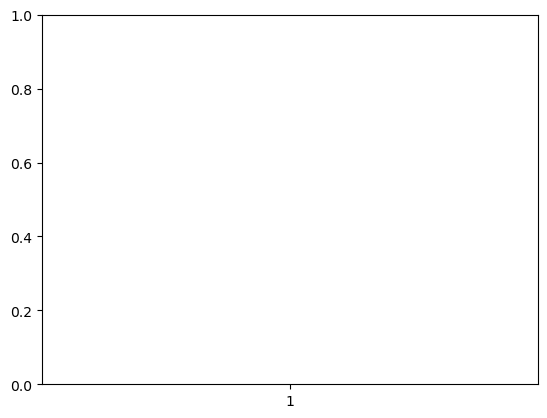

In [6]:
##saving progress: git add ____, git commit -m "message", git push origin main

## importing ts
import numpy as np
import random
import matplotlib.pyplot as plt


## list of words
astro_words = [
    "Space", "Earth", "Lunar", "Solar",
    "Orbit", "Light", "Night", "Comet", 
    "Radio", "Pluto", "Alpha", "Venus",
    "Phase", "Flare",
    "Mount", "Aries", "Dwarf", "Orion",
    "Titan", "Bulge", "Libra", "Virgo",
    "Epoch", "Thebe", "Ceres", "Umbra", 
    "Helix", "Deneb", "Nadir", "Apsis",
    ]
## word selection moved after difficulty
guesses_left = 6
guesses_so_far = 0 # guesses # so far, will be printed after each guess
appended_guess = [] #list of guesses, will be printed after each guess
n = 0 #this is the thing that will count up to test each letter (see below)
appended_letters = [] #list of letters guessed so far
colored_letters = [] #list of letters with colors, will be printed after each guess
##print(word, word_letters) ##remove this l8r(test)

#variables
guess_on_one = 0
guess_on_two = 0
guess_on_three = 0
guess_on_four = 0
guess_on_five = 0
guess_on_six = 0
loss_counter = 0
play = "yes"

print("AstWordle: Astronomy meets Wordle. ")
#game loop
while play=="yes":
    while True:  
        difficulty = input("choose your difficulty: easy, hard or ULTRAkill!!!: ").lower()
        if difficulty == "easy":
            astro_words_difficulty = astro_words[0:9]
            break
        elif difficulty == "hard":
            astro_words_difficulty = astro_words[10:19]
            break
        elif difficulty == "ultrakill":
            astro_words_difficulty = astro_words[20:29]
            break
        else:
            print("Please enter easy, hard, or ultrakill.")
    # Now select the word from the correct difficulty
    word = random.choice(astro_words_difficulty).upper()
    word_letters = list(word)
    print("you have 6 tries. after 3, you will be offered a hint.")
    ##loops until user imputs the right type of stuff

    while guesses_left > 0: #later add a nested thing where api gives hint if guesses_left == 3
        while True:
            guess = input("Enter a 5-letter word: ").upper()
            if len(guess) != 5:
                print("Please enter exactly 5 letters.")
                continue
            if not guess.isalpha():
                print("Please enter only letters.")
                continue
            break

        if guess == word and guesses_so_far == 0:
            guess_on_one += 1
            print(f"congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}")
            break
        if guess == word and guesses_so_far == 1:
            guess_on_two += 1
            print(f"congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}")
            break
        if guess == word and guesses_so_far == 2:
            guess_on_three += 1
            print(f"congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}")
            break
        if guess == word and guesses_so_far == 3:
            guess_on_four += 1
            print(f"congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}")
            break
        if guess == word and guesses_so_far == 4:
            guess_on_five += 1
            print(f"congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}")
            break
        if guess == word and guesses_so_far == 5:
            guess_on_six += 1
            print(f"congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}")
            break
        
        
        # appended_guess.append(guess) #makes list of guesses so far
        
        guess_letters = list(guess) #turns guess into letters, separates them into diff strings to test
        
        for n in range(5): #tests each letter in the guess, n is the thing that counts up to test each letter
            
            if guess_letters[n] == word_letters[n]: #if the two first letters are the same
            # colored_letters[n] = f"\x1b[102m{guess_letters[n]}\x1b[0m" #turns the letter bg green
                print(f"in {guess}, \x1b[102m{guess_letters[n]}\x1b[0m is correct and in the right position")
            elif guess_letters[n] in word_letters:
            #  colored_letters[n] = f"\x1b[103m{guess_letters[n]}\x1b[0m" #turns the letter bg yellow
                print(f"in {guess}, \x1b[103m{guess_letters[n]}\x1b[0m is correct but in the wrong position")
            else:
            #   colored_letters[n] = f"\x1b[100m{guess_letters[n]}\x1b[0m" #turns the letter bg gray
                print(f"in {guess}, \x1b[100m{guess_letters[n]}\x1b[0m is not in the word")
            #if guess_letters[n] not in appended_letters:    
            #  appended_letters.append(colored_letters[n])
                
            n += 1 #adds 1 to n so it can test the next letter in the next loop
            
        n = 0 #resets n to 1 so it can test the next guess
        print(f"letters tested so far: {appended_letters}") #prints the letters tested so far, will be reset after each guess 
        guesses_left -= 1 #subtracts 1 from # of guesses left
        guesses_so_far += 1 #adds 1 to the number of guesses so far
        #number of times user wins on nth guess vvv
        
        print(f"you have {guesses_left} guesses left") #prints the number of guesses left after each guess
        
    
        if guesses_left <= 0:
            print(f"\x1b[31m*extremely loud incorrect buzzer*\x1b[0m] nah bru it was {word}")
            loss_counter += 1
            break
    print({guess_on_one}, {guess_on_two}, {guess_on_three}, {guess_on_four}, {guess_on_five}, {guess_on_six})
    guess_graph_x = ['1', '2', '3', '4', '5', '6'] #x axis for graph, will be used to show how many guesses it took to win
    guess_graph_y = [{guess_on_one}, {guess_on_two}, {guess_on_three}, {guess_on_four}, {guess_on_five}, {guess_on_six}] 
    #^y axis, shows how often the user wins with each # of guesses
    #fig, ax= plt.subplots() #makes the graph
    plt.bar(guess_graph_x, guess_graph_y, color='skyblue') #makes the graph
    plt.xlabel('Guess Number') #x axis label    
    plt.ylabel('Number of Wins') #y axis label
    plt.title("AstWordle Guess Distribution") #title of graph
    plt.show() #shows the graph

    #library = ['Matplotlib', 'Seaborn', 'Plotly', 'Plotnine']
    #chosen_by = [2500, 1800, 3000, 2200]
    #plt.bar(library, chosen_by, color='skyblue')
    #plt.xlabel('Visualization Library')
    #plt.ylabel('Number of Enthusiasts')
    #plt.title('Which Visualization Library Do People Prefer?')
    #plt.show()

    #asking user to play again
    while True:
        play=input("play again? yes/no: ").lower()
        if not play == "yes" or play == "no":
            print("Please enter yes or no.")
            continue
        break